In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from sklearn.dummy import DummyClassifier


In [3]:
#importing data
df = pd.read_csv('data/train.csv')
df.head()

,disrict,client_catg,region,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,tarif_type_mean,counter_number_mean,counter_statue_mode,counter_code_mean,reading_remarque_mean,counter_coefficient_mean,old_index_mean,new_index_mean,months_number_mean,counter_type_mode
0,60,11,101,0.0,35,352.400000,10.571429,0.000000,0.000000,11.0,1335667.0,0,203.685714,6.971429,1.0,9444.542857,9807.514286,4.628571,0
1,69,11,107,0.0,37,557.540541,0.000000,0.000000,0.000000,11.0,678902.0,0,203.000000,7.216216,1.0,14330.756757,14888.297297,4.324324,0
2,62,11,301,0.0,18,798.611111,37.888889,0.000000,0.000000,11.0,572765.0,0,203.222222,7.055556,1.0,32873.000000,33709.500000,6.444444,0
3,69,11,105,0.0,20,1.200000,0.000000,0.000000,0.000000,11.0,2078.0,0,413.000000,6.150000,1.0,94.150000,95.350000,4.200000,0
4,62,11,303,0.0,14,663.714286,104.857143,117.357143,36.714286,11.0,19575.0,0,207.000000,8.857143,1.0,6900.428571,7823.071429,3.714286,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   disrict                    135493 non-null  int64  
 1   client_catg                135493 non-null  int64  
 2   region                     135493 non-null  int64  
 3   target                     135493 non-null  float64
 4   1transactions_count        135493 non-null  int64  
 5   consommation_level_1_mean  135493 non-null  float64
 6   consommation_level_2_mean  135493 non-null  float64
 7   consommation_level_3_mean  135493 non-null  float64
 8   consommation_level_4_mean  135493 non-null  float64
 9   tarif_type_mean            135493 non-null  float64
 10  counter_number_mean        135493 non-null  float64
 11  counter_statue_mode        135493 non-null  object 
 12  counter_code_mean          135493 non-null  float64
 13  reading_remarque_mean      13

In [5]:
df.describe()

,disrict,client_catg,region,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,tarif_type_mean,counter_number_mean,counter_code_mean,reading_remarque_mean,counter_coefficient_mean,old_index_mean,new_index_mean,months_number_mean
count,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,135493.000000,1.354930e+05,135493.000000,135493.000000,135493.000000,1.354930e+05,1.354930e+05,135493.000000
mean,63.511222,11.512506,206.159809,0.055841,33.040445,432.366021,115.334253,27.634241,73.097981,17.165116,6.909197e+11,199.546560,7.398796,1.001692,1.433351e+04,1.495876e+04,33.014595
std,3.354400,4.423761,104.207044,0.229614,26.092229,758.003977,747.416809,157.294518,814.216626,7.053088,3.789277e+12,95.431889,1.511180,0.223390,2.697593e+04,2.761697e+04,2745.088330
min,60.000000,11.000000,101.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.777778,0.000000e+00,0.000000,6.000000,0.888889,0.000000e+00,0.000000e+00,1.000000
25%,62.000000,11.000000,103.000000,0.000000,10.000000,215.280702,0.000000,0.000000,0.000000,11.000000,2.622571e+05,114.757143,6.812500,1.000000,2.953889e+03,3.385000e+03,4.000000
50%,62.000000,11.000000,107.000000,0.000000,30.000000,355.640625,4.987179,0.000000,0.000000,11.000000,6.691836e+05,203.000000,7.285714,1.000000,8.145750e+03,8.674342e+03,4.200000
75%,69.000000,11.000000,307.000000,0.000000,50.000000,541.888889,63.636364,3.929825,0.000000,25.254237,2.611890e+06,207.000000,7.962963,1.000000,1.764826e+04,1.828554e+04,4.657143
max,69.000000,51.000000,399.000000,1.000000,439.000000,99920.000000,115683.000000,38526.857143,79179.777778,45.000000,2.739110e+13,600.000000,413.000000,50.000000,1.463001e+06,1.542750e+06,602244.750000


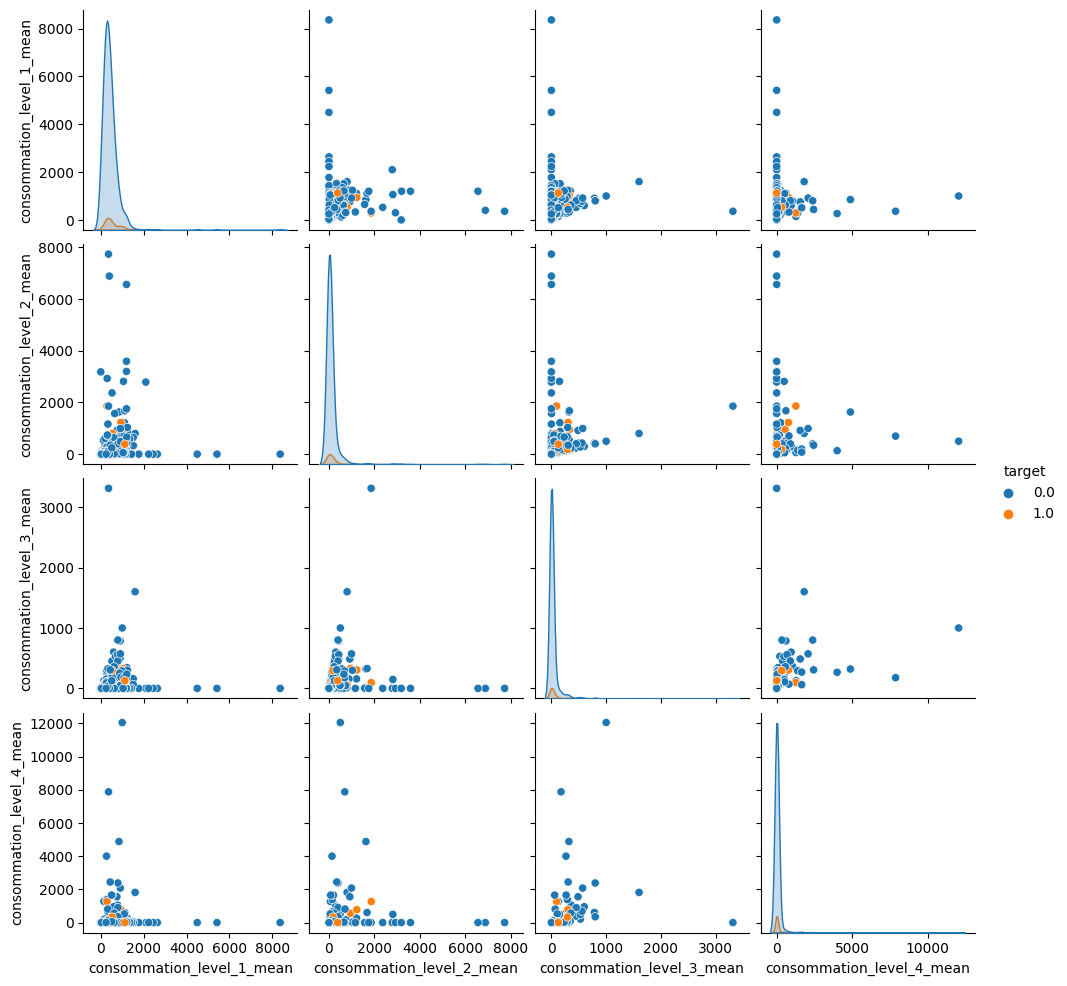

In [6]:
sns.pairplot(df[['consommation_level_1_mean', 'consommation_level_2_mean', 'consommation_level_3_mean', 'consommation_level_4_mean', 'target']].head(1000), hue='target')

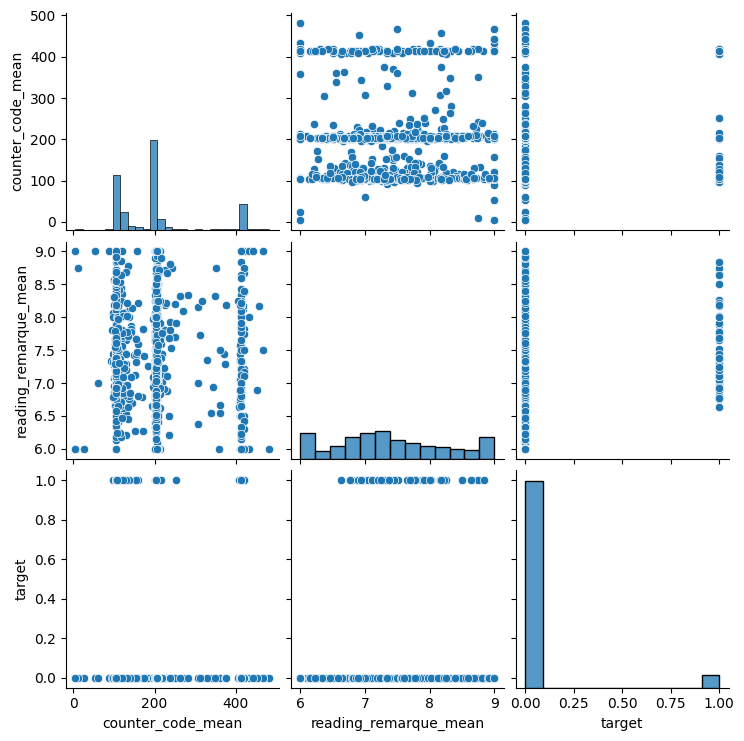

In [7]:
sns.pairplot(df[['counter_code_mean', 'reading_remarque_mean', 'target']].head(1000))

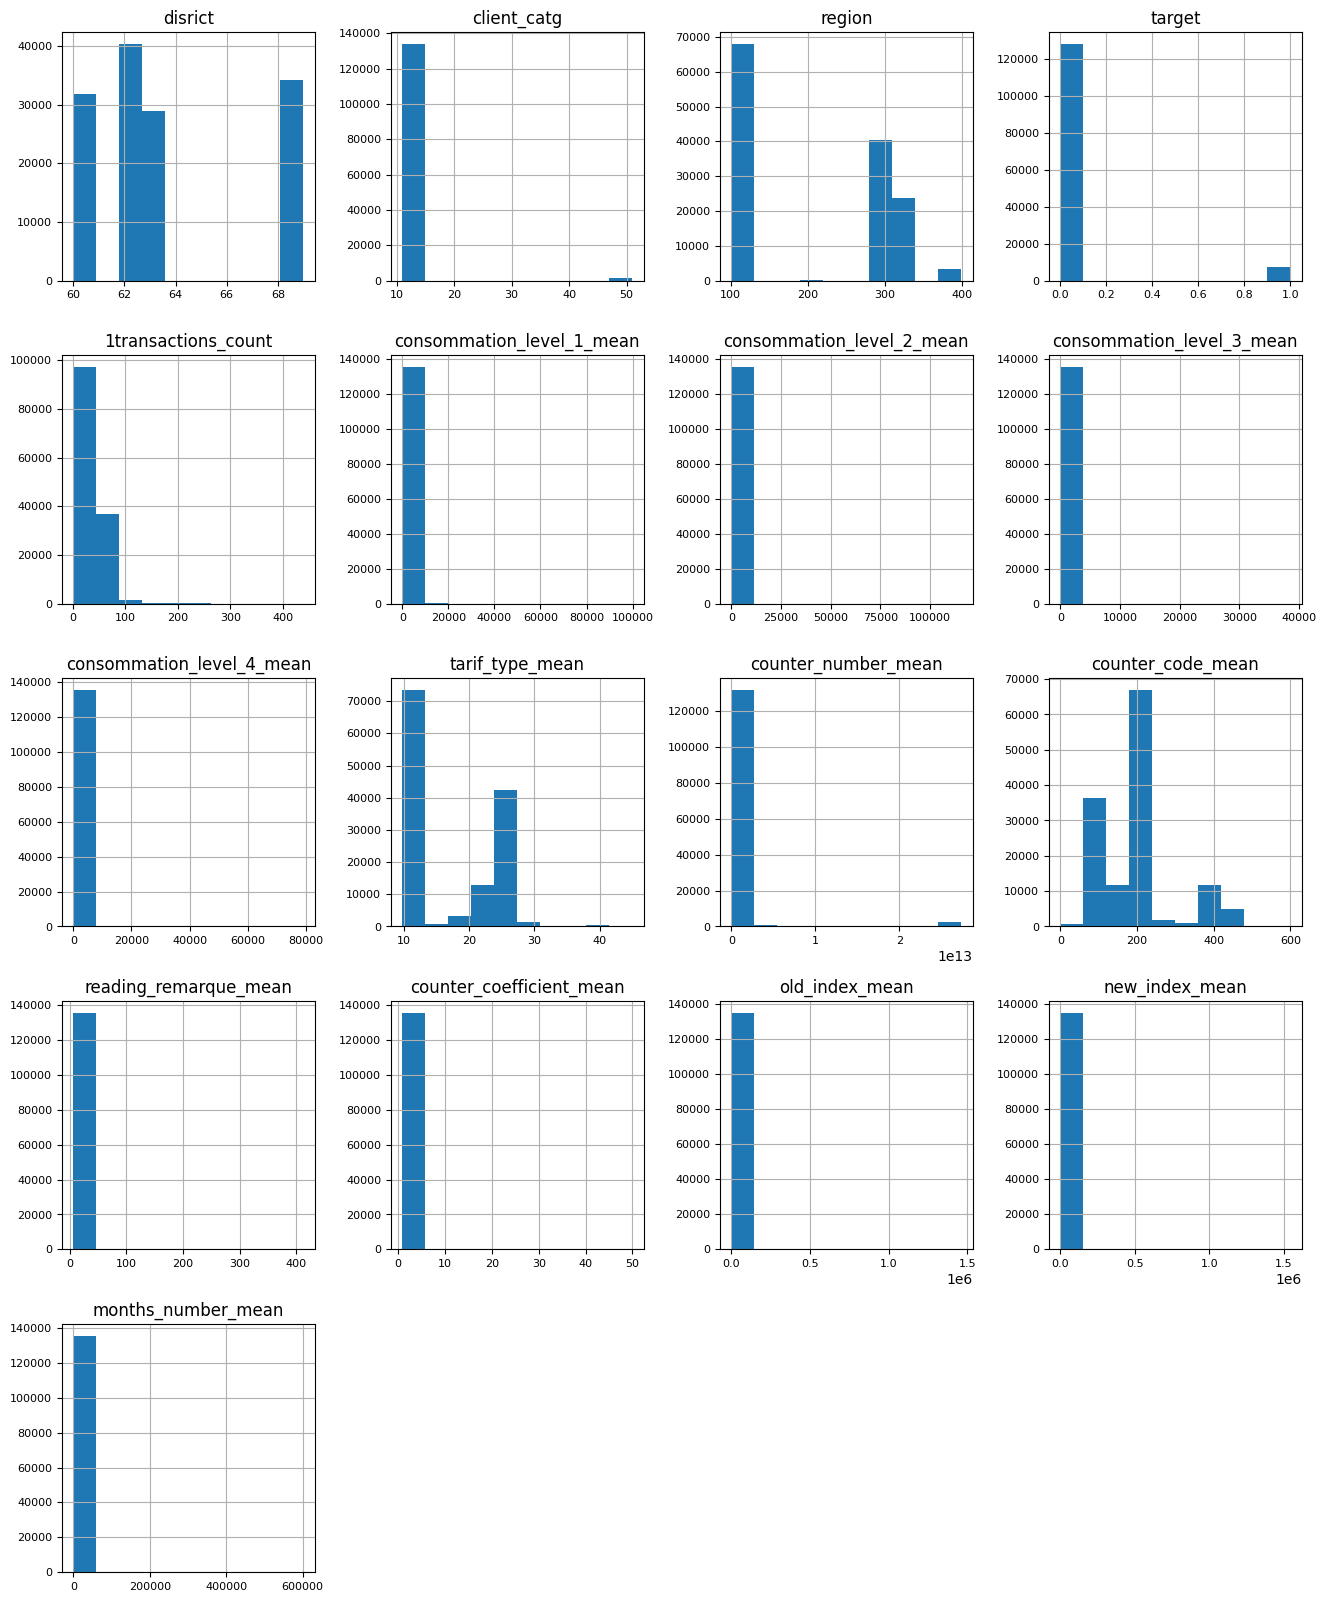

In [8]:
df.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8);

There seems to be a lot of outliers in the right region of the histograms (very high values), so that we should also look at the boxplots. 

In [9]:
def boxplot_matrix(df, nrows, ncols): 
    """function to plot a matrix of boxplots with nrows and ncols 

    Args:
        df (_type_): _description_
        nrows (_type_): _description_
        ncols (_type_): _description_
    """
    fig, ax = plt.subplots(nrows, ncols, figsize=(20,10)) # create subplots on n rows and n columns
    plt.suptitle('Distribution of numeric columns', fontsize=20)
    fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
    plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots
    feature = 0
    for row in list(range(nrows)): 
        for col in list(range(ncols)): 
            if feature >= df.shape[1]: 
                break
            else: 
                ax[row][col].boxplot(x = df.iloc[:,feature]) # creates boxplot for number of views
                ax[row][col].set_xticklabels(labels=["Views"]) # sets the label for the ticks on the x-axis
                #ax[row][col].set_ylim(0,2000000) # limits the y-axis values from 0 to 2000000 
                ax[row][col].set_title("Distribution of views count", fontsize = 15); # sets title for subplot
                plt.yscale("log") 
                feature += 1

In [10]:
df_boxplots = df.drop(['counter_statue_mode', 'counter_type_mode'], axis=1)

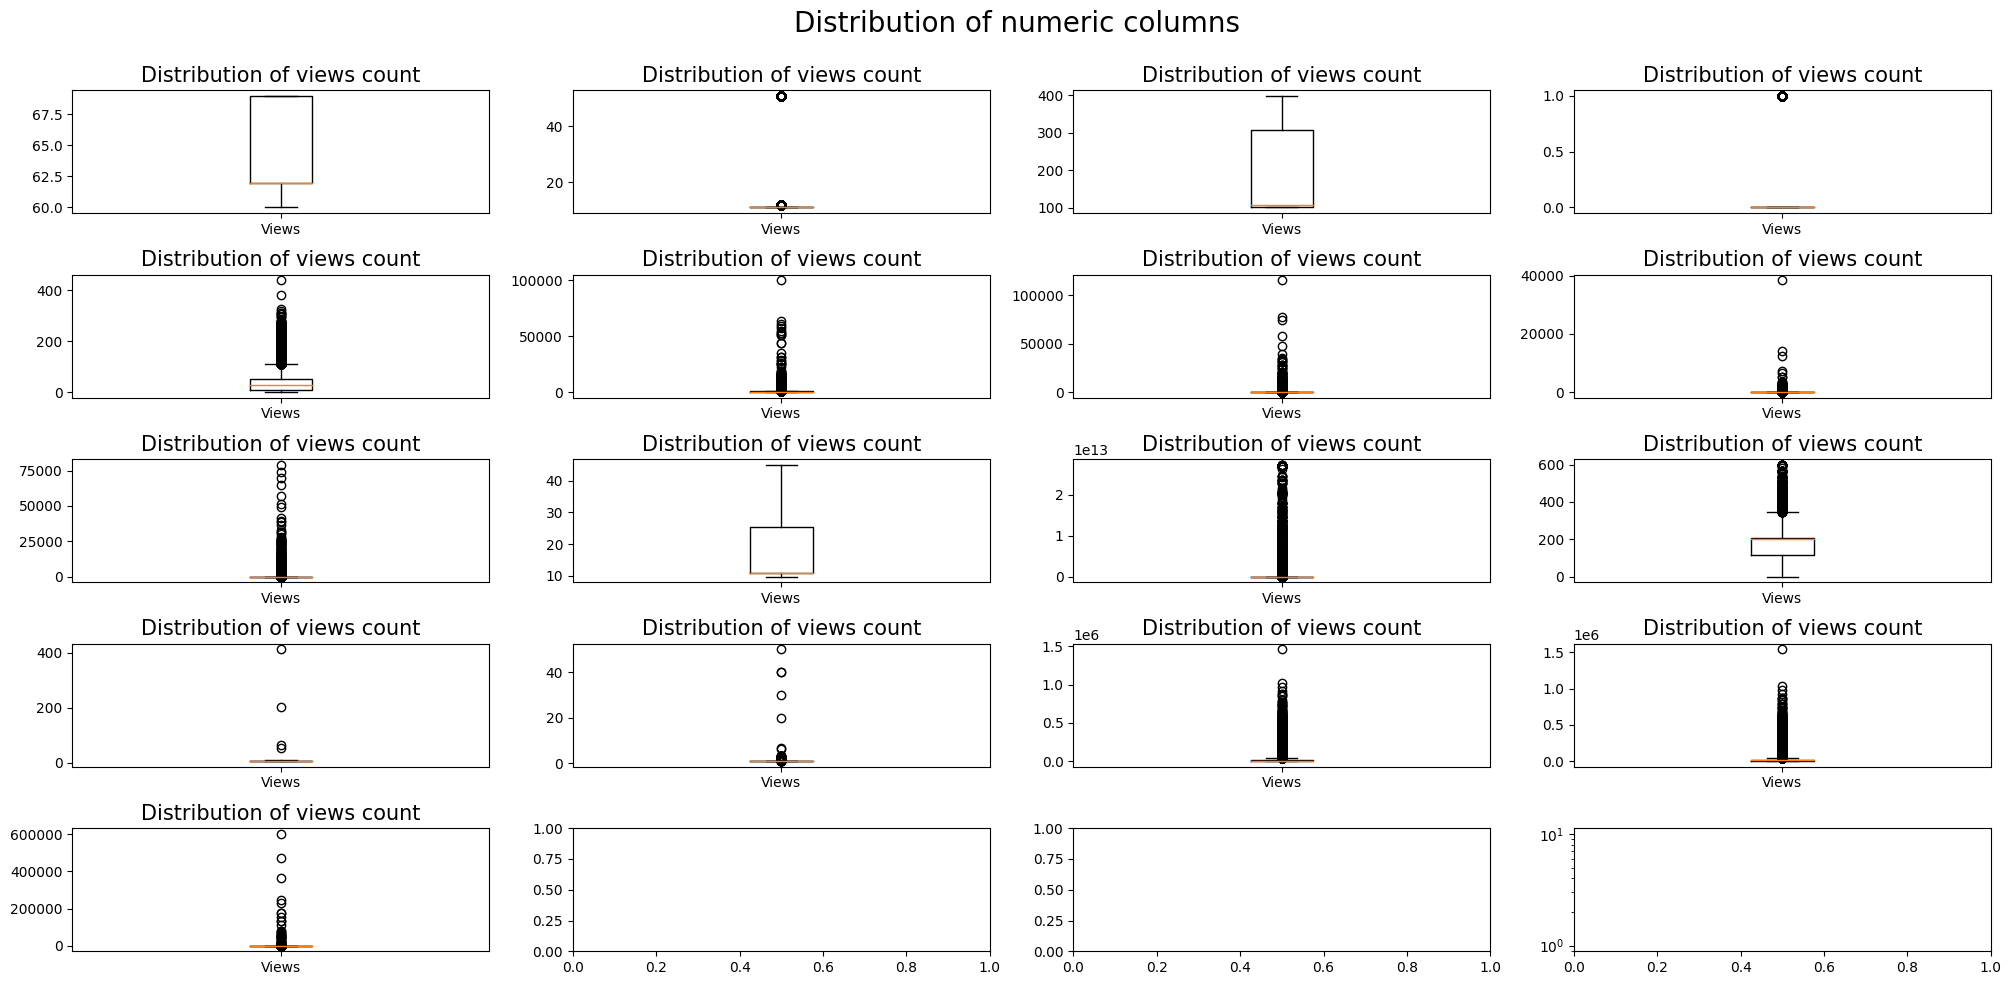

In [11]:
boxplot_matrix(df_boxplots, 5, 4)

We see a lot of outliers in our data (according to the classical 1.5 IQR definition), but decide to keep them for the moment, because they might the actually interesting (crucial) ones, when we talk about fraud cases. 

,disrict,client_catg,region,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,tarif_type_mean,counter_number_mean,counter_code_mean,reading_remarque_mean,counter_coefficient_mean,old_index_mean,new_index_mean,months_number_mean
disrict,1.00,0.03,-0.31,0.05,-0.01,-0.01,-0.02,0.02,0.02,0.15,0.02,-0.02,0.04,-0.01,-0.04,-0.04,-0.01
client_catg,0.03,1.00,-0.04,0.05,0.12,0.02,0.16,0.09,0.25,-0.01,-0.01,0.18,0.04,0.04,0.35,0.36,0.07
region,-0.31,-0.04,1.00,0.01,0.05,-0.03,-0.06,-0.06,-0.05,-0.11,0.05,-0.05,0.01,-0.00,-0.08,-0.08,-0.00
target,0.05,0.05,0.01,1.00,0.13,0.01,0.01,0.03,0.02,0.05,-0.02,-0.03,0.01,-0.00,0.04,0.04,0.00
1transactions_count,-0.01,0.12,0.05,0.13,1.00,-0.04,-0.01,-0.06,-0.03,0.53,-0.19,-0.36,-0.06,0.01,0.16,0.16,0.01
consommation_level_1_mean,-0.01,0.02,-0.03,0.01,-0.04,1.00,0.08,0.10,0.04,-0.06,-0.03,0.17,0.03,0.11,0.16,0.18,-0.00
consommation_level_2_mean,-0.02,0.16,-0.06,0.01,-0.01,0.08,1.00,0.10,0.10,-0.06,-0.02,0.19,0.00,0.03,0.31,0.33,0.05
consommation_level_3_mean,0.02,0.09,-0.06,0.03,-0.06,0.10,0.10,1.00,0.26,-0.06,0.01,0.20,0.09,0.01,0.13,0.15,0.09
consommation_level_4_mean,0.02,0.25,-0.05,0.02,-0.03,0.04,0.10,0.26,1.00,-0.05,0.01,0.18,0.06,0.01,0.29,0.32,0.00
tarif_type_mean,0.15,-0.01,-0.11,0.05,0.53,-0.06,-0.06,-0.06,-0.05,1.00,-0.15,-0.63,-0.02,-0.01,-0.05,-0.05,0.02


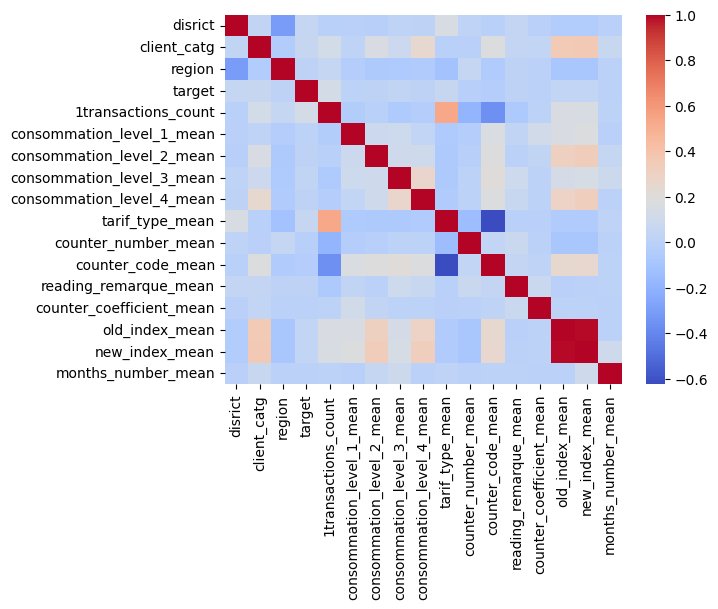

In [12]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
corr_matrix.round(2)

Conclusions: 
* keep old and new index in mind for later analyses
* target is not really correlated with any other single feature (we need a more complex model later) 
* region and disrict are a bit correlated (obvious)
* client_catg has several light correlations with some other features
* increased transactions correlate with increased tarif types
* correlation between counter code and transaction maybe random
* strong negative correlation between counter codes and tarif types (maybe old counters / customers have higher tarif types)

In [13]:
from sklearn.dummy import DummyClassifier
X=df.drop('target', axis=1)
y=df.target
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
print(roc_auc_score(y_test, dummy_clf.predict_proba(X_test)[:, 1]))
y_pred=dummy_clf.predict(X_test)
#dummy_clf.roc_auc_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

0.5
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     25586
         1.0       0.00      0.00      0.00      1513

    accuracy                           0.94     27099
   macro avg       0.47      0.50      0.49     27099
weighted avg       0.89      0.94      0.92     27099



In [14]:
from sklearn.dummy import DummyClassifier
X=df.drop('target', axis=1)
y=df.target
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
dummy_clf = DummyClassifier(strategy="prior")
dummy_clf.fit(X_train, y_train)
print(roc_auc_score(y_test, dummy_clf.predict_proba(X_test)[:, 1]))
y_pred=dummy_clf.predict(X_test)
#dummy_clf.roc_auc_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

0.5
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     25586
         1.0       0.00      0.00      0.00      1513

    accuracy                           0.94     27099
   macro avg       0.47      0.50      0.49     27099
weighted avg       0.89      0.94      0.92     27099



In [15]:
from sklearn.dummy import DummyClassifier
X=df.drop('target', axis=1)
y=df.target
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
dummy_clf = DummyClassifier(strategy="uniform", random_state=42)
dummy_clf.fit(X_train, y_train)
print(roc_auc_score(y_test, dummy_clf.predict_proba(X_test)[:, 1]))
y_pred=dummy_clf.predict(X_test)
#dummy_clf.roc_auc_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

0.5
              precision    recall  f1-score   support

         0.0       0.94      0.50      0.65     25586
         1.0       0.05      0.48      0.10      1513

    accuracy                           0.50     27099
   macro avg       0.50      0.49      0.37     27099
weighted avg       0.89      0.50      0.62     27099



In [18]:
from sklearn.dummy import DummyClassifier
X=df.drop('target', axis=1)
y=df.target
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf.fit(X_train, y_train)
print(roc_auc_score(y_test, dummy_clf.predict_proba(X_test)[:, 1]).round(4))
y_pred=dummy_clf.predict(X_test)
#dummy_clf.roc_auc_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

0.5061
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     25586
         1.0       0.07      0.07      0.07      1513

    accuracy                           0.90     27099
   macro avg       0.51      0.51      0.51     27099
weighted avg       0.90      0.90      0.90     27099



In [17]:
from sklearn.dummy import DummyClassifier
X=df.drop('target', axis=1)
y=df.target
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
dummy_clf = DummyClassifier(strategy="constant", constant=1)
dummy_clf.fit(X_train, y_train)
print(roc_auc_score(y_test, dummy_clf.predict_proba(X_test)[:, 1]))
y_pred=dummy_clf.predict(X_test)
#dummy_clf.roc_auc_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

0.5
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     25586
         1.0       0.06      1.00      0.11      1513

    accuracy                           0.06     27099
   macro avg       0.03      0.50      0.05     27099
weighted avg       0.00      0.06      0.01     27099



In [20]:
# mean value of target shwoing imbalanced dataset and proportion used for stratified baseline model
df.target.mean().round(4)

0.0558

For our baseline model we tested all strategies in the dummy classifier. 
The most appropriate for our dataset is "most-frequent", and "stratified". 
Our model should also perform better than the "stratified" roc_auc_score. The roc_auc_score is 0.5061. 

## Milestone 1: Group1
### Fraud Detection:
* Value of Product:
    * Find fraudulent clients, safe money, avoid reputation damage and prevent money laundering.
* Prediction:
    * Client is fraudulent
* Evaluation Metric:
    * roc-auc score
* Baseline Model:
    * Based on experience in the past we expect a proportion of 5.58% fraudulent clients. 
* Score:
    * roc-auc-score = 0.5061